# Imported Libraries and Files

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchaudio
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os

import random
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import matplotlib.pyplot

from utils.preprocessing import AudioDataset
from utils.models import Base_CNN, Base_CNN_Simplified, Base_CNN_Transformer, Base_CNN_GRU
from utils.train_utils import train_model, test_model, train_accuracy_model, plot_history, plot_confusion_matrix
from utils.data_loader import load_cremad, load_ravdess, load_tess, load_savee

# Necessary Paths

In [2]:
cremad_path = '/projectnb/ec523/projects/teamSER/cremad/'
ravdess_path = '/projectnb/ec523/projects/teamSER/ravdess/audio_speech_actors_01-24/'
tess_path = '/projectnb/ec523/projects/teamSER/tess/TESS Toronto emotional speech set data/'
savee_path = '/projectnb/ec523/projects/teamSER/savee/ALL/'

training_split = 0.8
testing_split = 0.2
batch_size = 32
sampling_rate = 22000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Data Loading and Preprocessing

In [3]:
cremad_df = load_cremad(cremad_path)
ravdess_df = load_ravdess(ravdess_path)
tess_df = load_tess(tess_path)
savee_df = load_savee(savee_path)

In [4]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
df = pd.concat([cremad_df, ravdess_df, tess_df, savee_df], axis=0)
df = df.reset_index(drop=True)
df = df[~df['Emotion'].isin(['calm', 'surprise'])]
df['Emotion'].value_counts()

Emotion
anger        1923
disgust      1923
happiness    1923
fear         1923
sadness      1923
neutral      1703
Name: count, dtype: int64

In [5]:
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
df['Emotion'].value_counts()

Emotion
0    1923
1    1923
3    1923
2    1923
5    1923
4    1703
Name: count, dtype: int64

In [6]:
dataset = AudioDataset(df)

all_indices = list(range(len(dataset)))
all_labels = dataset.labels

train_idx, test_idx = train_test_split(
    all_indices, test_size=testing_split, stratify=all_labels, random_state=42)

train_set = torch.utils.data.Subset(dataset, train_idx)
test_set = torch.utils.data.Subset(dataset, test_idx)

train_set.dataset.transform = True
test_set.dataset.transform = False

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

# Base CNN

In [11]:
model = Base_CNN().to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
trained_model, history = train_model(model, optimizer, criterion, device, train_loader, test_loader, num_epochs=30)

Epoch 1/30 - Loss: 455.4422 | Train Acc: 49.22% | Val Acc: 48.59%
Epoch 2/30 - Loss: 366.6519 | Train Acc: 54.30% | Val Acc: 54.68%
Epoch 3/30 - Loss: 333.0807 | Train Acc: 60.26% | Val Acc: 59.01%
Epoch 4/30 - Loss: 303.3753 | Train Acc: 60.70% | Val Acc: 60.03%
Epoch 5/30 - Loss: 284.2249 | Train Acc: 68.73% | Val Acc: 64.66%
Epoch 6/30 - Loss: 269.4714 | Train Acc: 69.47% | Val Acc: 64.62%
Epoch 7/30 - Loss: 250.9453 | Train Acc: 74.72% | Val Acc: 67.67%
Epoch 8/30 - Loss: 235.2739 | Train Acc: 74.54% | Val Acc: 67.49%
Epoch 9/30 - Loss: 227.9668 | Train Acc: 67.45% | Val Acc: 61.35%
Epoch 10/30 - Loss: 210.4099 | Train Acc: 82.64% | Val Acc: 71.33%
Epoch 11/30 - Loss: 202.0764 | Train Acc: 83.05% | Val Acc: 71.82%
Epoch 12/30 - Loss: 177.8945 | Train Acc: 78.57% | Val Acc: 67.49%
Epoch 13/30 - Loss: 166.9565 | Train Acc: 78.00% | Val Acc: 67.54%
Epoch 14/30 - Loss: 156.0754 | Train Acc: 86.94% | Val Acc: 71.20%
Epoch 15/30 - Loss: 140.4386 | Train Acc: 91.29% | Val Acc: 71.29%
Epoc

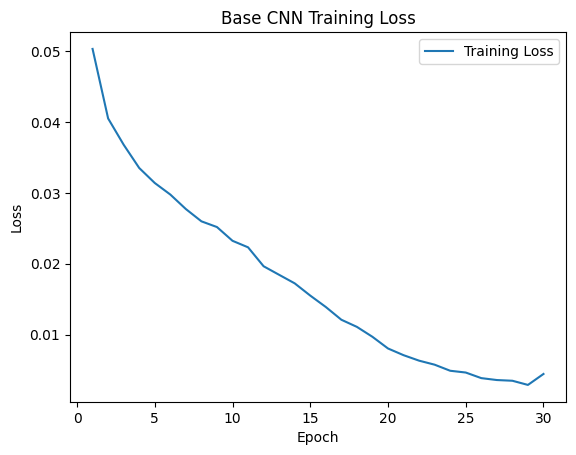

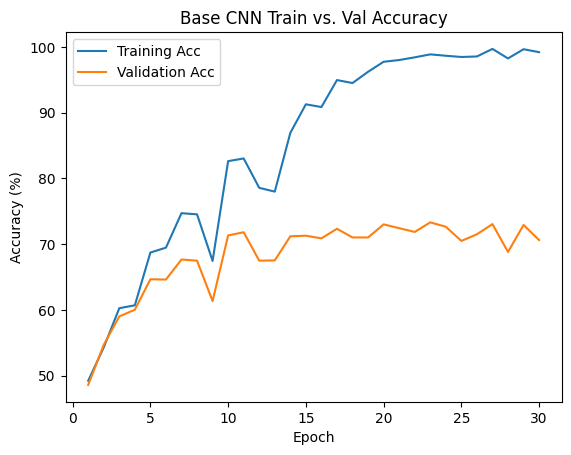

In [13]:
plot_history(history, 'Base CNN')

<Figure size 800x600 with 0 Axes>

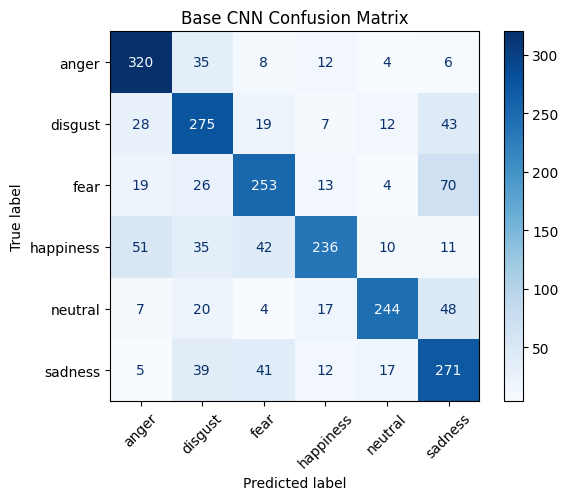

In [14]:
plot_confusion_matrix(trained_model, test_loader, device, "Base CNN Confusion Matrix")

# CNN-Transformer

In [7]:
model = Base_CNN_Transformer().to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [8]:
trained_model, history = train_model(model, optimizer, criterion, device, train_loader, test_loader, num_epochs=30)

Epoch 1/30 - Loss: 417.6490 | Train Acc: 54.71% | Val Acc: 55.12%
Epoch 2/30 - Loss: 315.5707 | Train Acc: 63.23% | Val Acc: 61.22%
Epoch 3/30 - Loss: 276.3357 | Train Acc: 63.50% | Val Acc: 58.79%
Epoch 4/30 - Loss: 250.2157 | Train Acc: 72.32% | Val Acc: 65.42%
Epoch 5/30 - Loss: 225.1652 | Train Acc: 75.33% | Val Acc: 66.65%
Epoch 6/30 - Loss: 199.6751 | Train Acc: 78.64% | Val Acc: 68.82%
Epoch 7/30 - Loss: 175.9841 | Train Acc: 80.59% | Val Acc: 66.74%
Epoch 8/30 - Loss: 158.0013 | Train Acc: 85.33% | Val Acc: 69.35%
Epoch 9/30 - Loss: 132.0115 | Train Acc: 84.25% | Val Acc: 66.87%
Epoch 10/30 - Loss: 116.0411 | Train Acc: 90.84% | Val Acc: 69.30%
Epoch 11/30 - Loss: 92.6512 | Train Acc: 91.20% | Val Acc: 68.86%
Epoch 12/30 - Loss: 79.7338 | Train Acc: 94.41% | Val Acc: 69.21%
Epoch 13/30 - Loss: 68.9974 | Train Acc: 94.57% | Val Acc: 69.39%
Epoch 14/30 - Loss: 57.2287 | Train Acc: 95.14% | Val Acc: 67.31%
Epoch 15/30 - Loss: 45.8695 | Train Acc: 96.34% | Val Acc: 69.79%
Epoch 16/

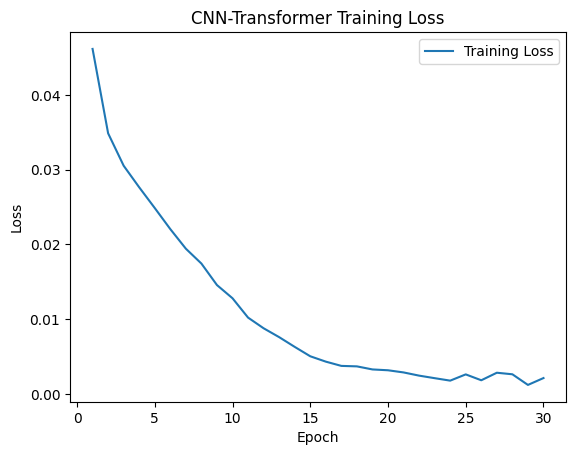

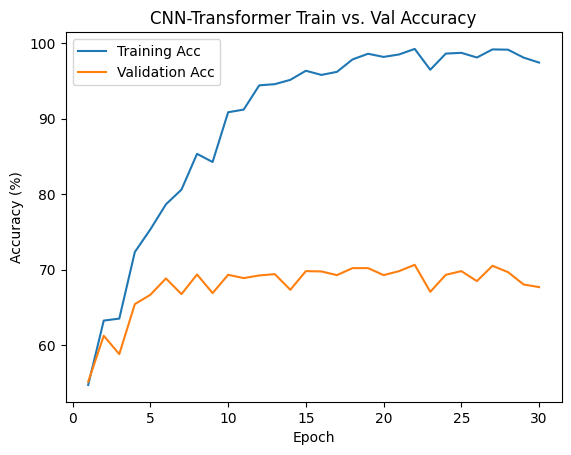

In [9]:
plot_history(history, 'CNN-Transformer')

<Figure size 800x600 with 0 Axes>

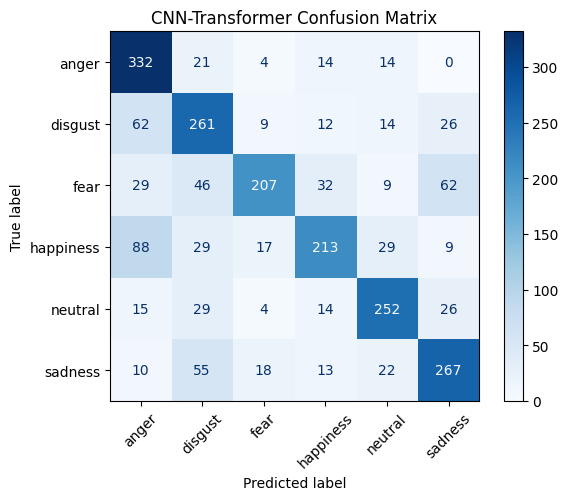

In [10]:
plot_confusion_matrix(trained_model, test_loader, device, "CNN-Transformer Confusion Matrix")

# CNN-GRU

In [12]:
model = Base_CNN_GRU().to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [13]:
trained_model, history = train_model(model, optimizer, criterion, device, train_loader, test_loader, num_epochs=30)

Epoch 1/30 - Loss: 416.9832 | Train Acc: 54.41% | Val Acc: 52.87%
Epoch 2/30 - Loss: 311.8104 | Train Acc: 66.77% | Val Acc: 61.84%
Epoch 3/30 - Loss: 255.5202 | Train Acc: 71.03% | Val Acc: 64.58%
Epoch 4/30 - Loss: 210.6318 | Train Acc: 79.28% | Val Acc: 68.37%
Epoch 5/30 - Loss: 170.1327 | Train Acc: 86.91% | Val Acc: 68.24%
Epoch 6/30 - Loss: 124.0077 | Train Acc: 90.50% | Val Acc: 68.46%
Epoch 7/30 - Loss: 84.4591 | Train Acc: 94.33% | Val Acc: 68.15%
Epoch 8/30 - Loss: 45.0776 | Train Acc: 98.92% | Val Acc: 69.39%
Epoch 9/30 - Loss: 19.3753 | Train Acc: 99.75% | Val Acc: 67.76%
Epoch 10/30 - Loss: 9.3044 | Train Acc: 99.96% | Val Acc: 69.83%
Epoch 11/30 - Loss: 4.0641 | Train Acc: 99.97% | Val Acc: 69.96%
Epoch 12/30 - Loss: 2.5837 | Train Acc: 99.98% | Val Acc: 69.39%
Epoch 13/30 - Loss: 1.7916 | Train Acc: 99.98% | Val Acc: 69.66%
Epoch 14/30 - Loss: 1.1594 | Train Acc: 99.98% | Val Acc: 70.19%
Epoch 15/30 - Loss: 1.0066 | Train Acc: 99.98% | Val Acc: 69.26%
Epoch 16/30 - Loss:

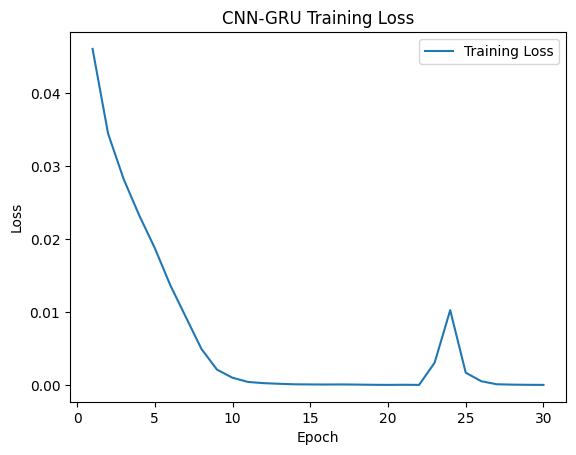

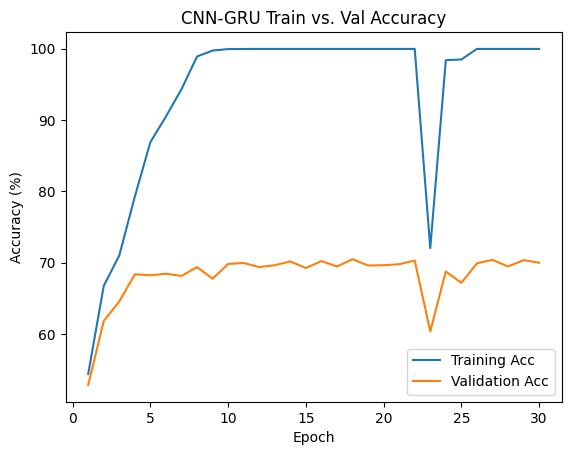

In [14]:
plot_history(history, 'CNN-GRU')

<Figure size 800x600 with 0 Axes>

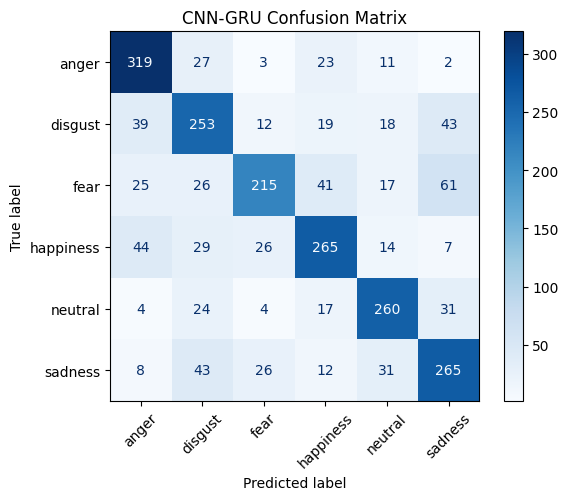

In [15]:
plot_confusion_matrix(trained_model, test_loader, device, "CNN-GRU Confusion Matrix")

# ResNet

In [16]:
resnet = torchvision.models.resnet18(weights=False)

resnet.fc = nn.Linear(in_features=512, out_features=6)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

for param in resnet.parameters():
    param.requires_grad = True


criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001)

/share/pkg.7/pytorch/1.13.1/install/lib/SCC/../python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [17]:
trained_model, history = train_model(resnet, optimizer, criterion, device, train_loader, test_loader, num_epochs=30)

Epoch 1/30 - Loss: 379.3182 | Train Acc: 44.74% | Val Acc: 45.01%
Epoch 2/30 - Loss: 313.6426 | Train Acc: 55.53% | Val Acc: 56.05%
Epoch 3/30 - Loss: 277.0735 | Train Acc: 63.86% | Val Acc: 60.91%
Epoch 4/30 - Loss: 254.3979 | Train Acc: 61.69% | Val Acc: 59.32%
Epoch 5/30 - Loss: 236.0894 | Train Acc: 67.31% | Val Acc: 62.28%
Epoch 6/30 - Loss: 220.4948 | Train Acc: 70.52% | Val Acc: 64.00%
Epoch 7/30 - Loss: 203.4277 | Train Acc: 76.44% | Val Acc: 67.71%
Epoch 8/30 - Loss: 182.5819 | Train Acc: 78.95% | Val Acc: 68.55%
Epoch 9/30 - Loss: 165.0193 | Train Acc: 79.87% | Val Acc: 66.30%
Epoch 10/30 - Loss: 146.3311 | Train Acc: 82.23% | Val Acc: 66.17%
Epoch 11/30 - Loss: 121.0589 | Train Acc: 85.16% | Val Acc: 66.87%
Epoch 12/30 - Loss: 94.9423 | Train Acc: 93.49% | Val Acc: 70.76%
Epoch 13/30 - Loss: 82.0834 | Train Acc: 95.41% | Val Acc: 71.47%
Epoch 14/30 - Loss: 57.5443 | Train Acc: 93.95% | Val Acc: 68.64%
Epoch 15/30 - Loss: 43.8318 | Train Acc: 95.10% | Val Acc: 68.46%
Epoch 16

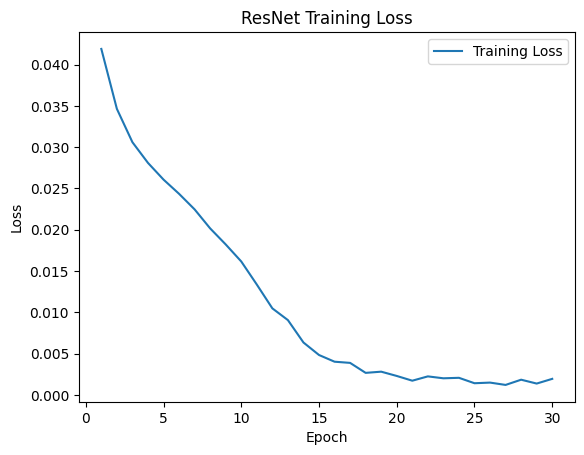

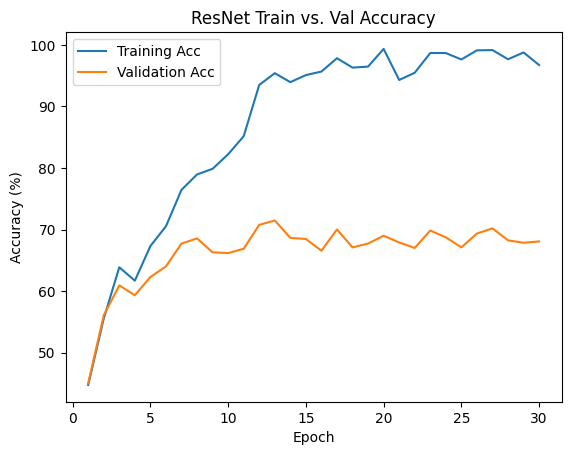

In [18]:
plot_history(history, 'ResNet')

<Figure size 800x600 with 0 Axes>

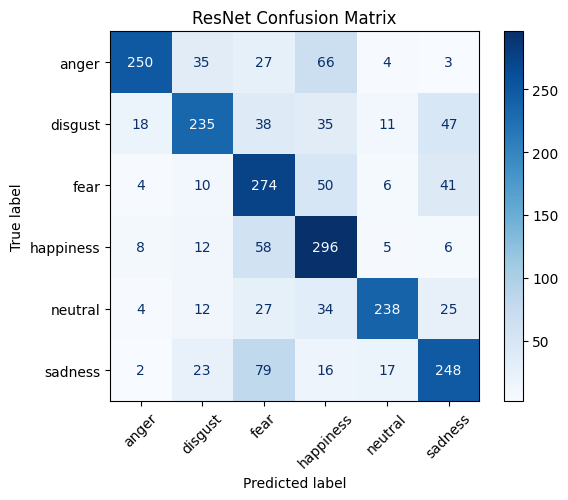

In [19]:
plot_confusion_matrix(trained_model, test_loader, device, "ResNet Confusion Matrix")